Exploratory Data Analysis - Sports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv("D:/abcd/matches.csv")
data.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [3]:
Data = pd.read_csv("D:/abcd/deliveries.csv")
Data.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [4]:
season_data=data[['id','season','winner']]
complete_data=Data.merge(season_data,how='inner',left_on='match_id',right_on='id')
data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [5]:
data = data.drop(columns=["umpire3"],axis=1)
data.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [6]:
winner_per_season = data.groupby("season")["winner"].value_counts()
winner_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

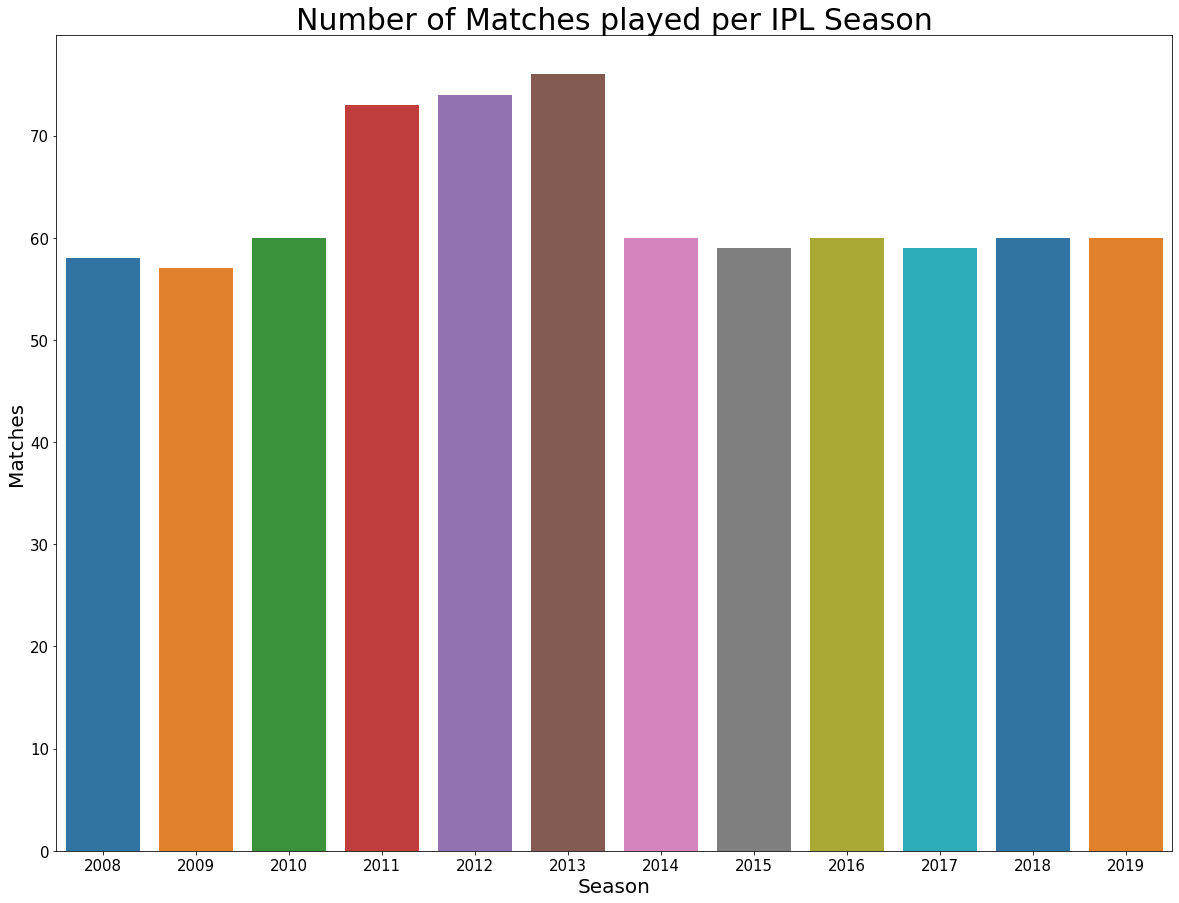

In [7]:
plt.figure(figsize = (20,15))
sns.countplot('season',data=data,palette="tab10")
plt.title("Number of Matches played per IPL Season",fontsize=30)
plt.xlabel("Season",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Matches',fontsize=20)
plt.show()

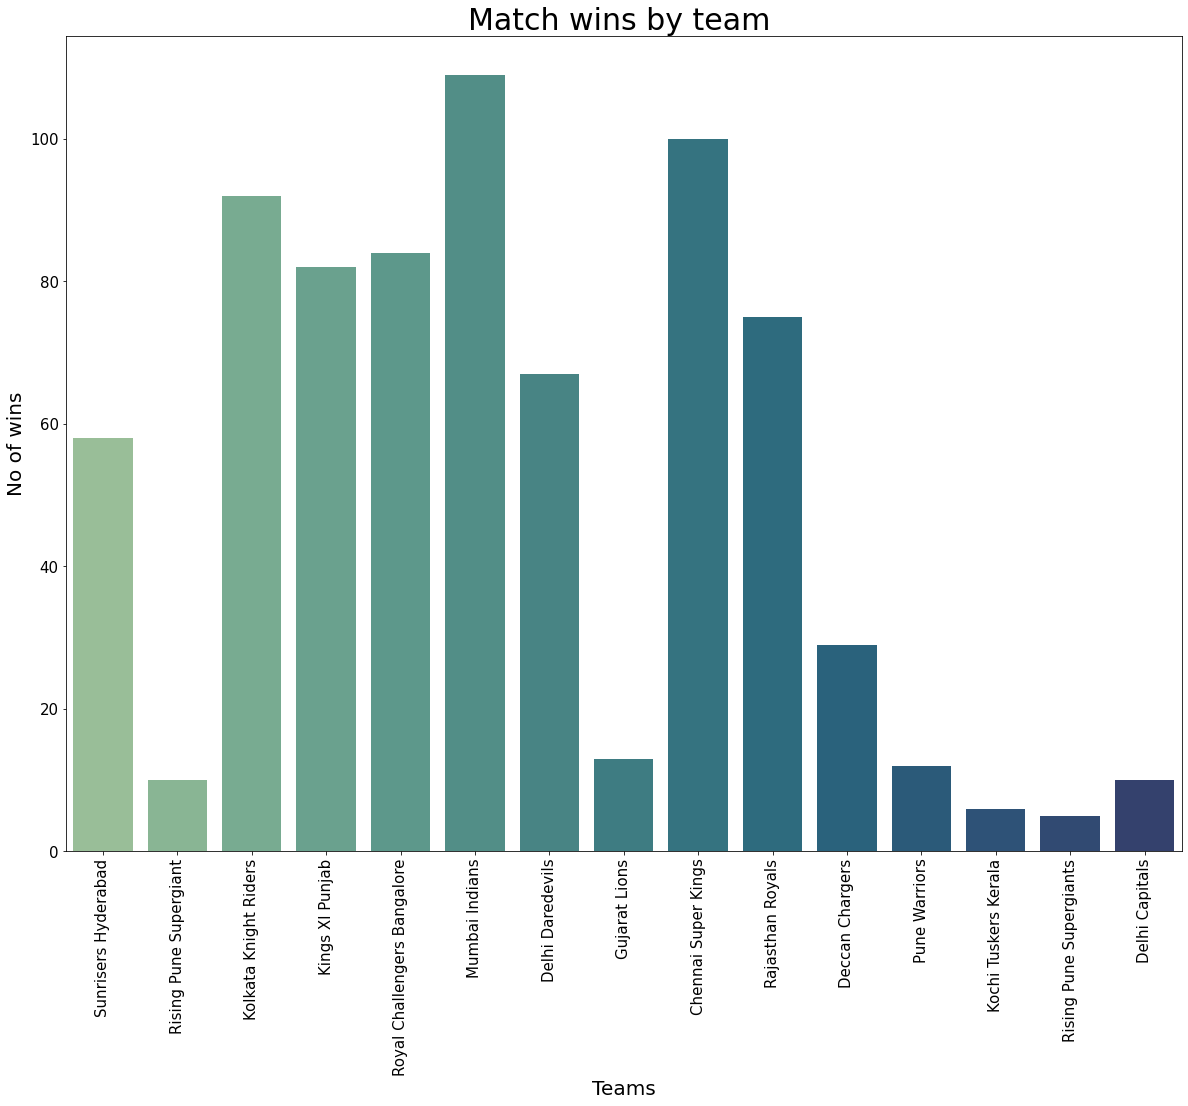

In [8]:
plt.figure(figsize = (20,15))
sns.countplot(x='winner',data=data, palette='crest')
plt.title("Match wins by team ",fontsize=30)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel("Teams",fontsize=20)
plt.ylabel("No of wins",fontsize=20)
plt.show()

In [9]:
data['win_by']=np.where(data['win_by_runs']>0,'Bat first','Bowl first')

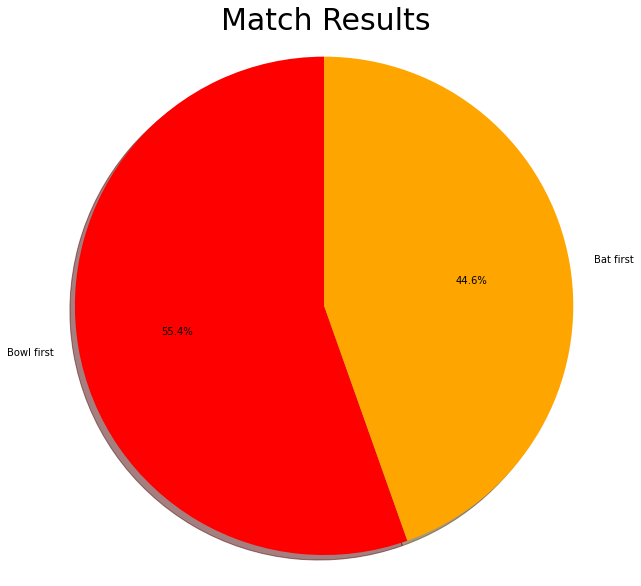

In [10]:
Win=data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['red', 'orange']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Results',fontsize=30)
plt.axis('equal')
plt.show()

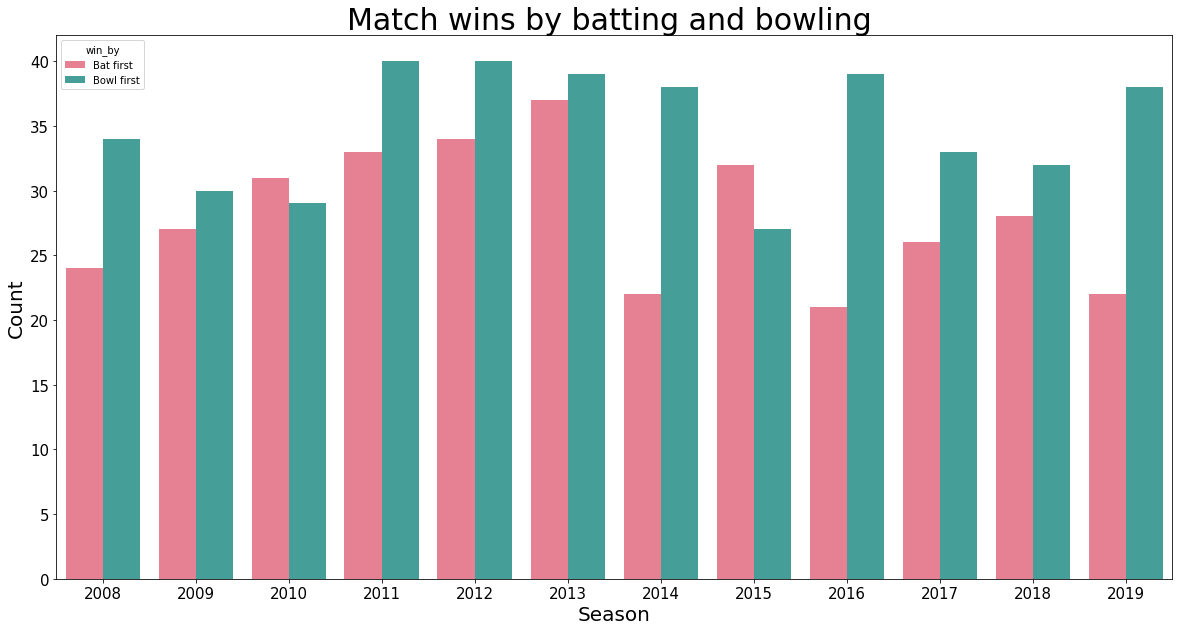

In [11]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='win_by',data=data,palette='husl')
plt.title("Match wins by batting and bowling ",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Season",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

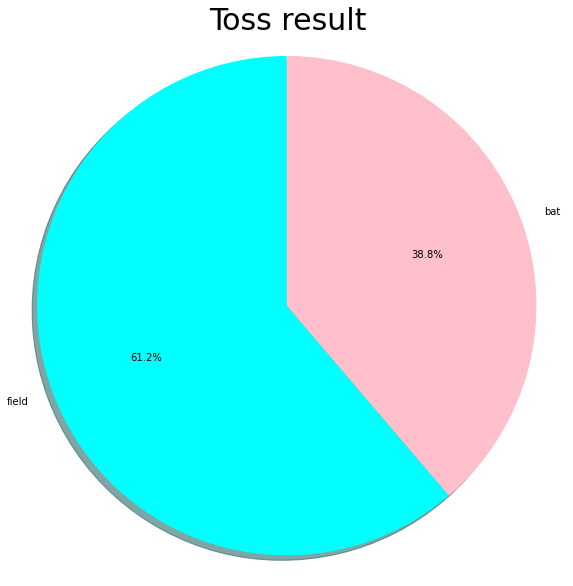

In [12]:
Toss=data.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['cyan', 'pink']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=30)
plt.axis('equal')
plt.show()

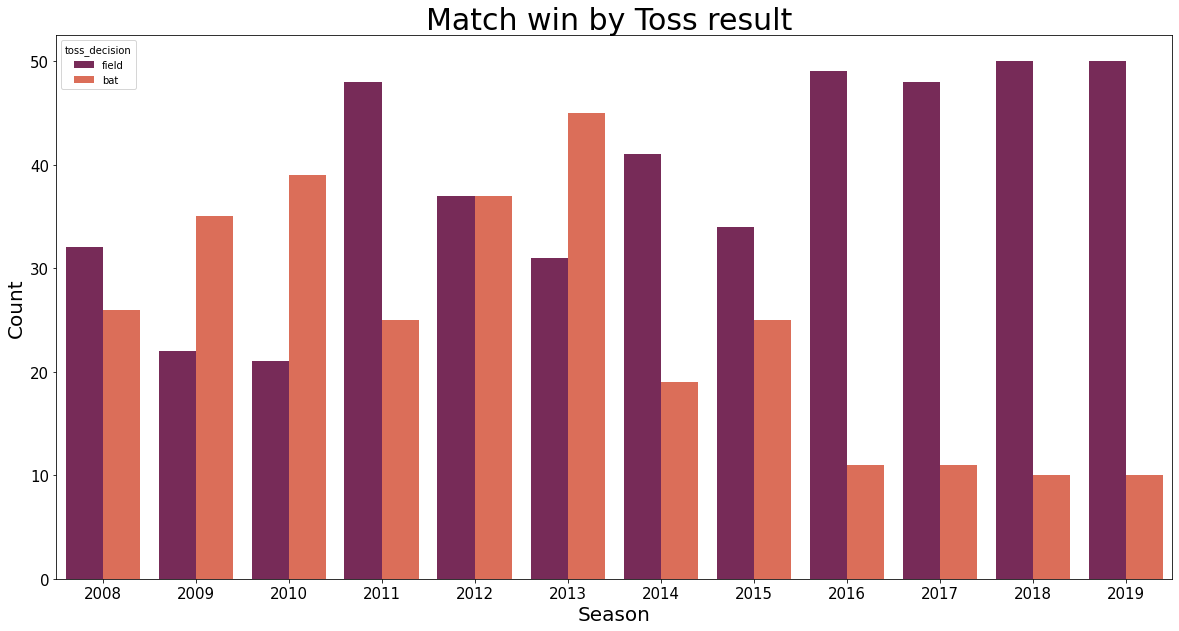

In [13]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='toss_decision',data=data,palette='rocket')
plt.title("Match win by Toss result ",fontsize=30)
plt.xlabel("Season",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [14]:
final_matches=data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


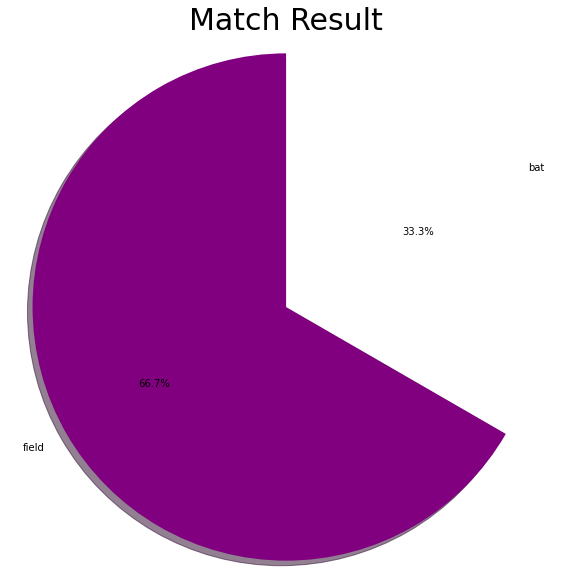

In [15]:
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['purple', 'white']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=30)
plt.axis('equal')
plt.show()

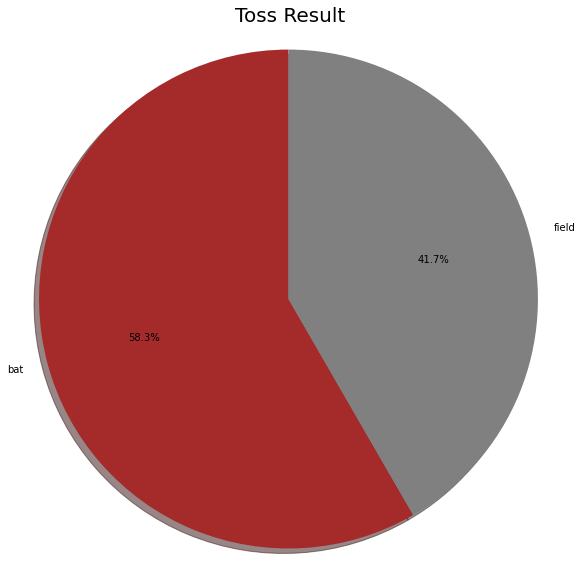

In [16]:
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['brown', 'grey']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

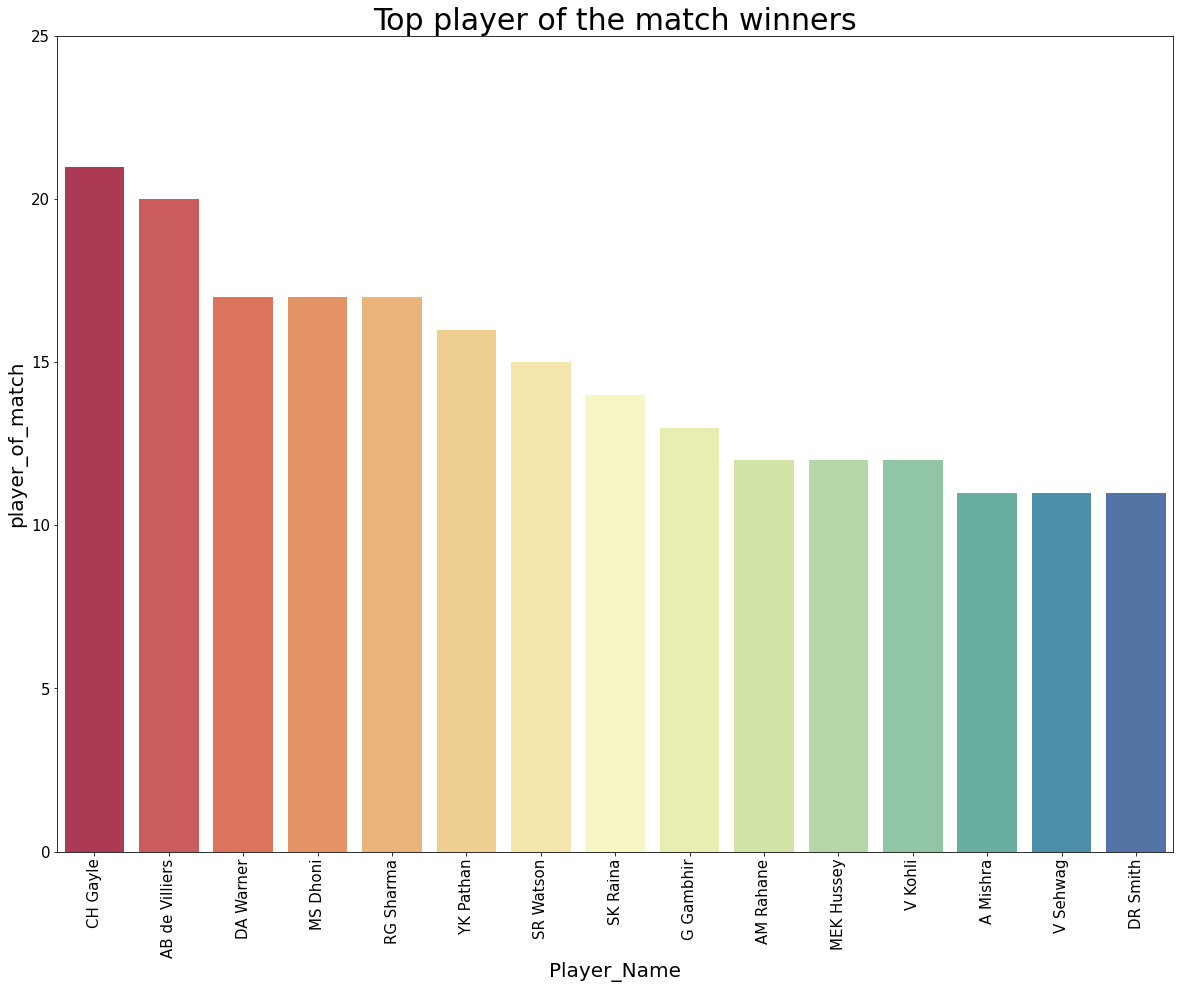

In [17]:
top_players = data.player_of_match.value_counts()[:15]
fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_xlim([0,20])
ax.set_ylabel("Count",fontsize=20)
ax.set_xlabel("Player_Name",fontsize=20)
ax.set_title("Top player of the match winners",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
top_players.plot.bar(figsize = (20,15))
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Spectral");
plt.show()

In [18]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [19]:
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

In [20]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [21]:
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [22]:
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


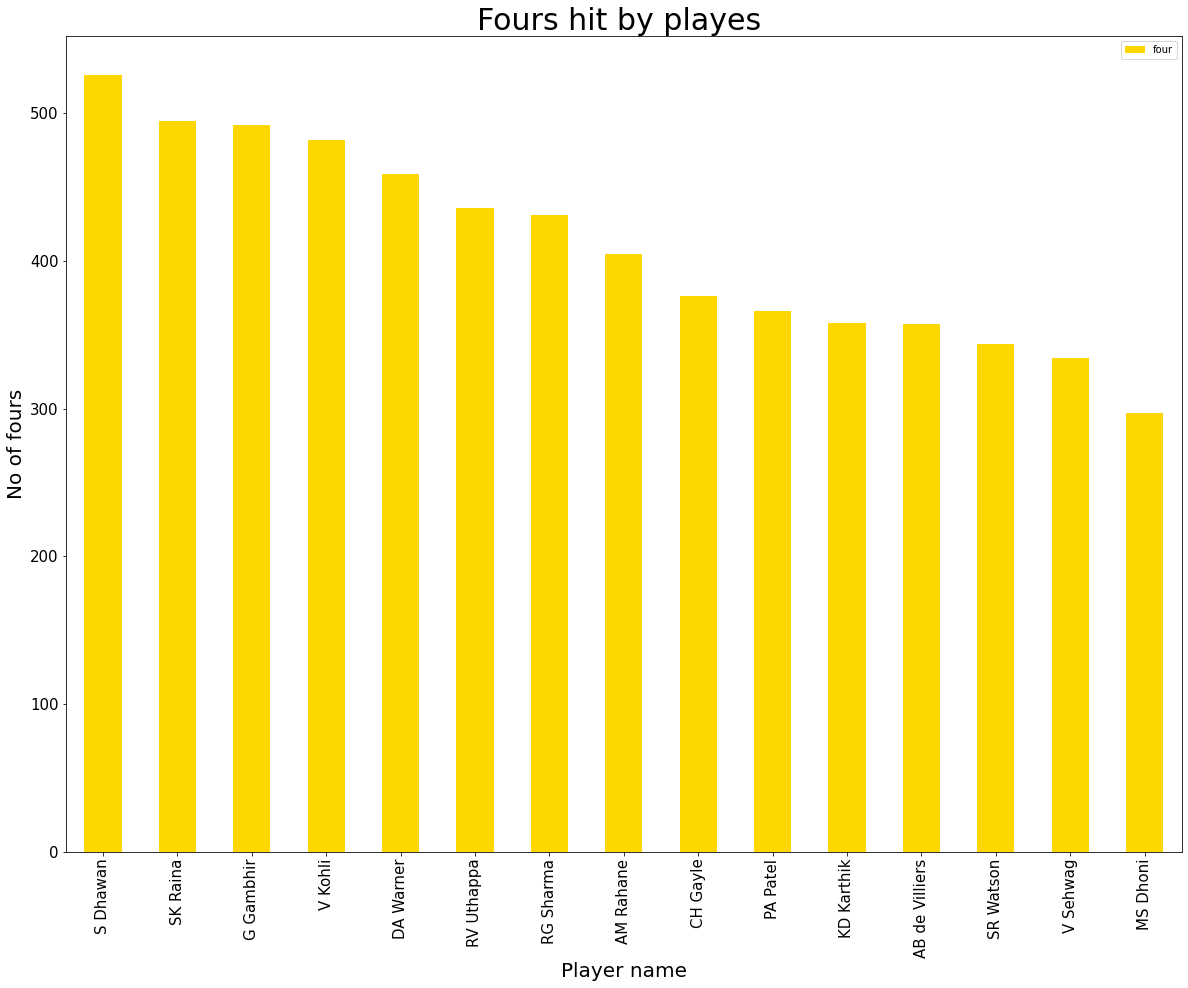

In [23]:
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:15,:].plot('batsman','four',kind='bar',color='gold',figsize = (20,15))
ax.set_title("Fours hit by playes ",fontsize=30)
plt.xticks(rotation=90)
plt.xlabel("Player name",fontsize=20)
plt.ylabel("No of fours",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

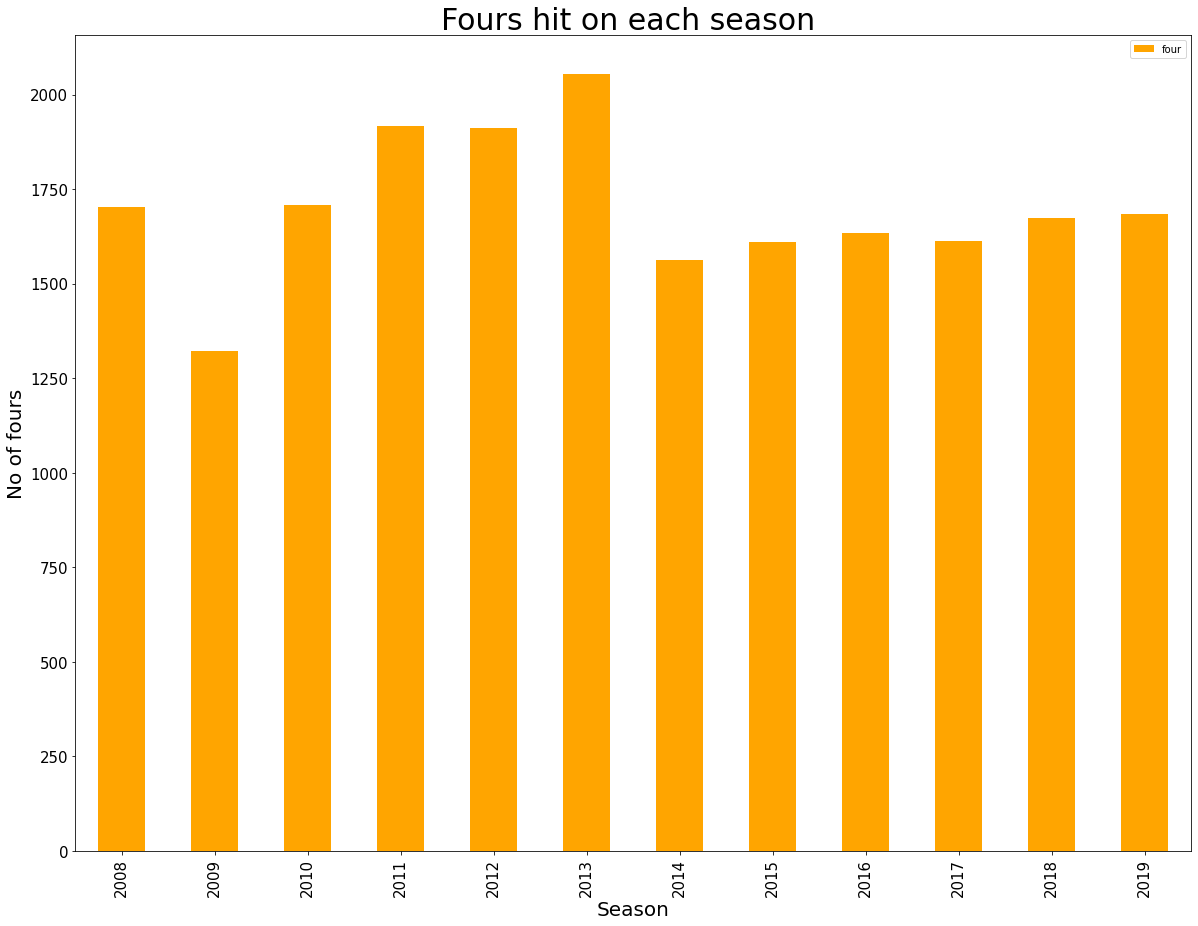

In [24]:
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'orange',figsize = (20,15))
plt.title("Fours hit on each season ",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Season",fontsize=20)
plt.ylabel("No of fours",fontsize=20)
plt.show()

In [25]:
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


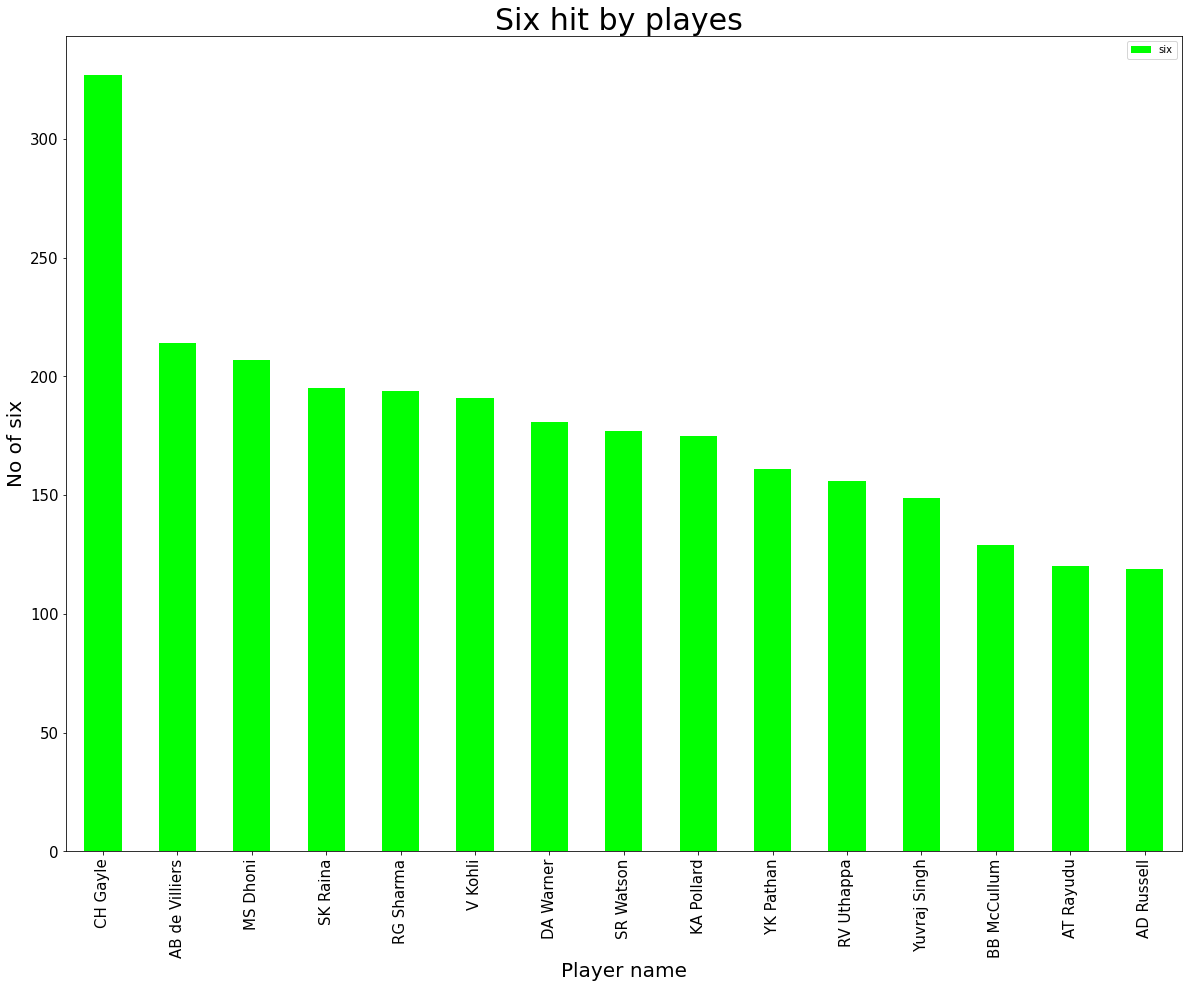

In [26]:
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:15,:].plot('batsman','six',kind='bar',color='lime',figsize = (20,15))
plt.title("Six hit by playes ",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Player name",fontsize=20)
plt.ylabel("No of six",fontsize=20)
plt.show()

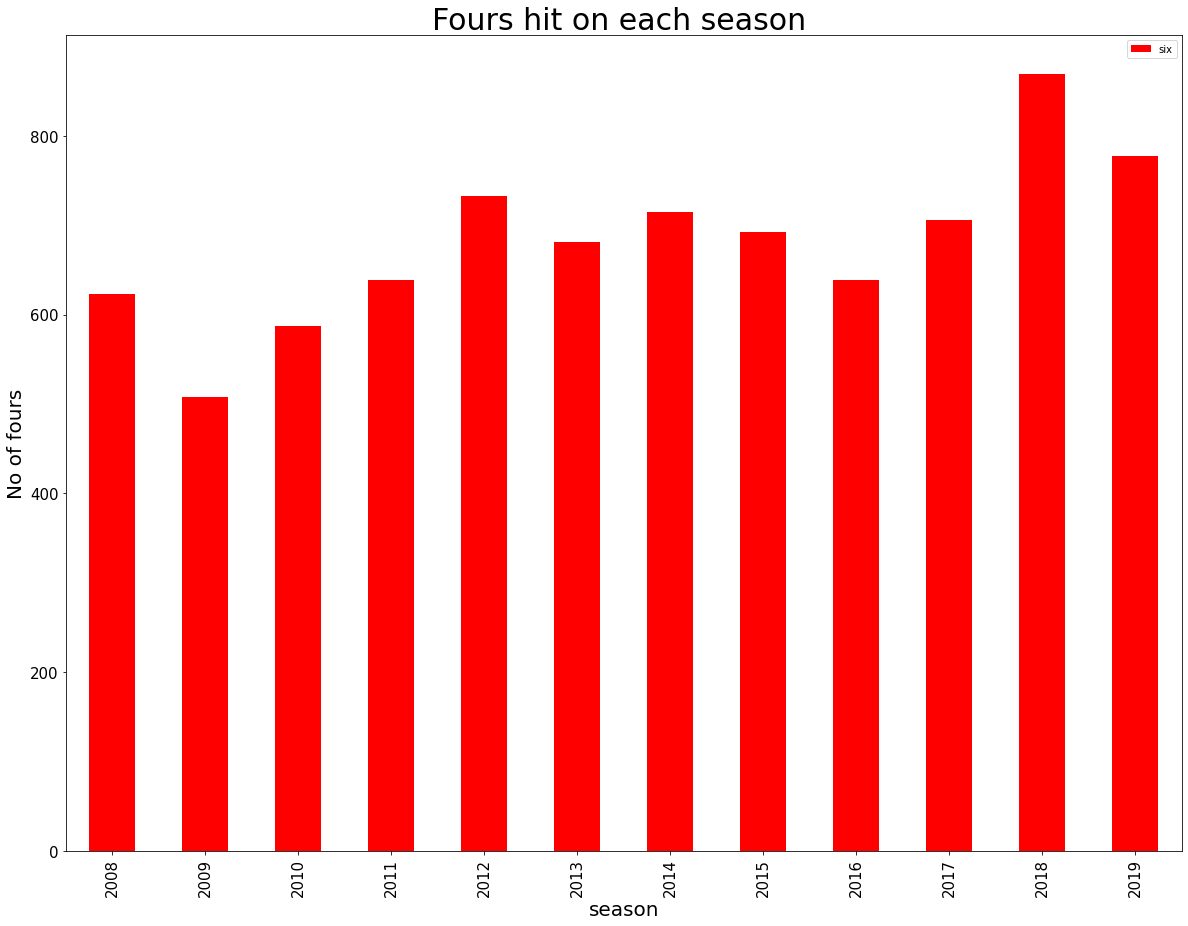

In [27]:
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'red',figsize=(20,15))
plt.title("Fours hit on each season ",fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("season",fontsize=20)
plt.ylabel("No of fours",fontsize=20)
plt.show()

In [28]:
batsman_score=Data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print(" Top 15  Run Scorers in IPL")
batsman_score.iloc[:15,:]

 Top 15  Run Scorers in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [29]:
No_Matches_player= Data[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(15)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


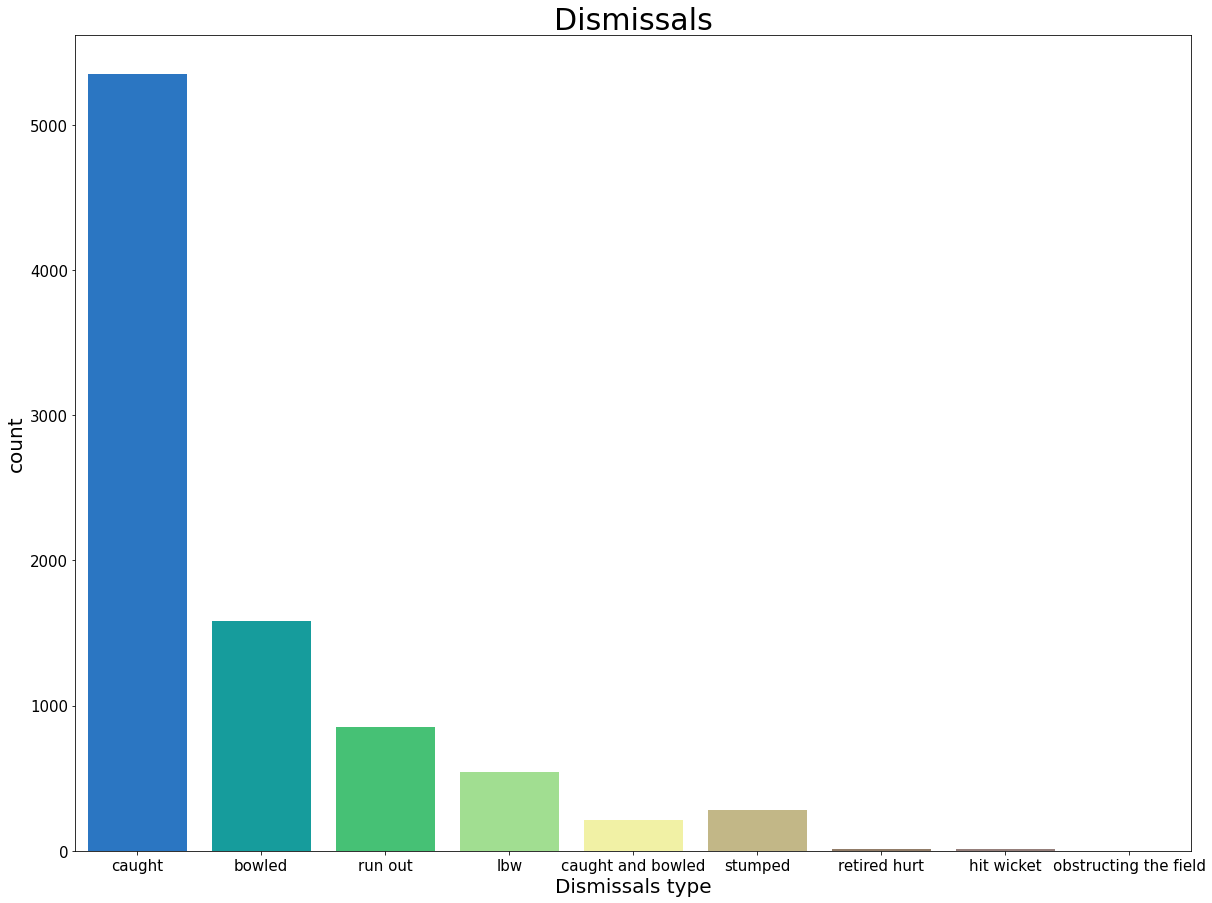

In [30]:
plt.figure(figsize=(20,15))
ax=sns.countplot(Data.dismissal_kind,palette="terrain")
plt.title("Dismissals",fontsize=30)
plt.xlabel("Dismissals type",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [31]:
wicket_data=Data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:15,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


Conclusion :
1) Highest number of matches played in season: 2013

2) Highest number of match won by the team: Mumbai Indians

3) Bowling teams has higher percentage of winning than the batting teams.

4) Highest number of decisions after toss: Fielding

5) In finals matches the teams which decide to do fielding first win the matches more then the team which bat first.

6) In finals most teams after winning toss decide to do fielding first.

7) Top player of match winning: CH gayle

8) It is interesting that in the IPL finals, 3/4 times the team that won the toss also wins IPL.

9) Highest number of four hits: Shikar Dhawan.

10) Highest number of six hits: CH gayle.

11) Top leading run scorer:V Kohli

12) Highest number of matches played: SK Raina

13) Highest number of Dismissals by: Catch out

14) Highest number of wickets: SL Malinga.